<a href="https://colab.research.google.com/github/MFaiqKhan/Deep-CNN-Image-Classifier/blob/main/Deep_CNN_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
# Install dependencies Package and Setup
!pip install tensorflow tensorflow-gpu opencv-python matplolib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [249]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.2.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      21.3.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.0
arviz                            0.15.1
astropy                          5.2.2
astunparse                       1.6.3
async-timeout                    4.0.2
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [250]:
import tensorflow as tf
import os

In [251]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [252]:
# gpus available on our device, limit the memory consumption so we can avoid Out of Memory Error.
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [253]:
# Using py3nvml: python binding for NVML library, utilized for managing NVIDIA GPUs, To get gpu name
!pip install py3nvml

from py3nvml.py3nvml import *

def get_gpu_details():
  nvmlInit()
  deviceCount = nvmlDeviceGetCount()
  for i in range(deviceCount):
      handle = nvmlDeviceGetHandleByIndex(i)
      info = nvmlDeviceGetMemoryInfo(handle)
      print("Device", i, ":", nvmlDeviceGetName(handle))
      print("Total memory:", info.total)
      print("Free memory:", info.free)
      print("Used memory:", info.used)
  nvmlShutdown()

get_gpu_details()


Device 0 : Tesla T4
Total memory: 16106127360
Free memory: 12736856064
Used memory: 3369271296


## Removing Dodgy Images

In [254]:
import cv2
import imghdr
import matplotlib.pyplot as plt


You can remove any images below 10kbs and any, webp extensions images manually from the folder

In [255]:
os.listdir('images')

['imgcar', 'imgbik']

In [256]:
os.listdir('images/imgbik')

['apni-bike.jpg',
 'image31 (2).jpeg',
 'images24.jpg',
 'image10.jpeg',
 'images38.jpg',
 'image25 (2).jpeg',
 'image7 (2).jpeg',
 'images29 (2).jpg',
 'images63 (2).jpg',
 'images27.jpg',
 'images62 (2).jpg',
 'images15 (2).jpg',
 'images32.jpg',
 'images28 (2).jpg',
 'images49 (2).jpg',
 'images39 (2).jpg',
 'tesla-cybertruck-bike-16554583054x3.jpg',
 'lead_1._suzuki_gsx_2_2.jpg',
 'images30 (2).jpg',
 'image28.jpeg',
 'image2 (2).jpeg',
 'images26.jpg',
 'images61 (2).jpg',
 'image21.jpeg',
 'images30.jpg',
 'images43.jpg',
 'image13.jpeg',
 'images4.jpg',
 'image5 (2).jpeg',
 'image9 (2).jpeg',
 'image23 (2).jpeg',
 'image6 (2).jpeg',
 'yzf-r1-super-bike-500x500.png',
 'oben-electric-bike62306eca07dd7.jpg',
 'images15.jpg',
 'images63.jpg',
 'photo.jpg',
 'images18.jpg',
 'raider6437f733e3c37.jpg',
 'images31 (2).jpg',
 '63809_2022_Royal_Enfield_Hunter_350_468x263.jpg',
 'image22 (2).jpeg',
 '42-Side.jpeg',
 'images38 (2).jpg',
 '710mLp2yoXL.jpg',
 'images10 (2).jpg',
 'JBLTP-FGR_

In [257]:
image_extensions = ['jpeg', 'png', 'jpg', 'bmp']

In [258]:
for image_class in ['images/imgbik', 'images/imgcar']:
  for image in os.listdir(image_class):
    print(image)



apni-bike.jpg
image31 (2).jpeg
images24.jpg
image10.jpeg
images38.jpg
image25 (2).jpeg
image7 (2).jpeg
images29 (2).jpg
images63 (2).jpg
images27.jpg
images62 (2).jpg
images15 (2).jpg
images32.jpg
images28 (2).jpg
images49 (2).jpg
images39 (2).jpg
tesla-cybertruck-bike-16554583054x3.jpg
lead_1._suzuki_gsx_2_2.jpg
images30 (2).jpg
image28.jpeg
image2 (2).jpeg
images26.jpg
images61 (2).jpg
image21.jpeg
images30.jpg
images43.jpg
image13.jpeg
images4.jpg
image5 (2).jpeg
image9 (2).jpeg
image23 (2).jpeg
image6 (2).jpeg
yzf-r1-super-bike-500x500.png
oben-electric-bike62306eca07dd7.jpg
images15.jpg
images63.jpg
photo.jpg
images18.jpg
raider6437f733e3c37.jpg
images31 (2).jpg
63809_2022_Royal_Enfield_Hunter_350_468x263.jpg
image22 (2).jpeg
42-Side.jpeg
images38 (2).jpg
710mLp2yoXL.jpg
images10 (2).jpg
JBLTP-FGR_02.jpg
re-super-meteriote-1672990328.jpg
images50 (2).jpg
image32 (2).jpeg
images2 (2).jpg
HD-wallpaper-mt15-motorcycle-motor-bike-bikes-racer-mt15-sport-bike-thumbnail.jpg
s1000rr639452

In [259]:
img = cv2.imread(os.path.join('images/imgbik', '42-Side.jpeg'))
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [260]:
type(img)

numpy.ndarray

In [261]:
img.shape

(720, 1280, 3)

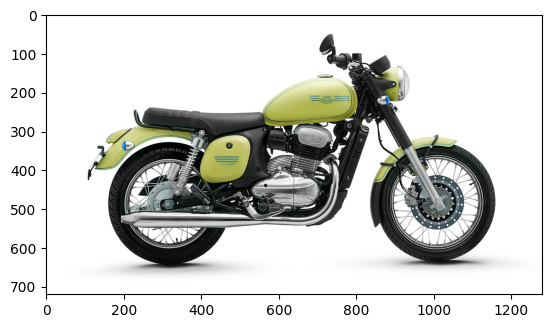

In [262]:
plt.imshow(img)

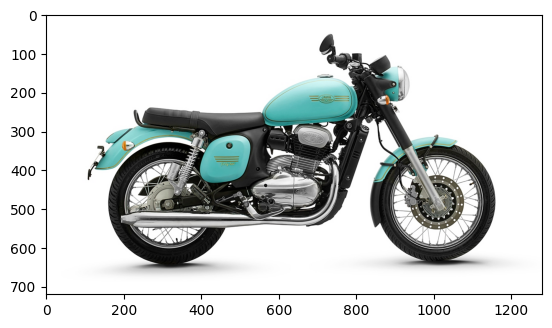

In [263]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

The key difference between the two piece of code lies in the way the image data is being processed before being displayed.

plt.imshow(img) : This piece of code uses the imshow function of the matplotlib.pyplot library (typically imported as plt) to display an image. The input img is a raw image file, which could be read by cv2.imread() or any other image reading function. It assumes that the image file is in RGB (Red, Green, Blue) color space. If the image is not in RGB, the color of the image when displayed may be distorted.

    import matplotlib.pyplot as plt
    import cv2

    img = cv2.imread('image.jpg')  # Reading the image file
    plt.imshow(img)                # Displaying the image
    ```

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) : In this case, the image data is being processed by the cv2.cvtColor() function before being displayed. The function cv2.cvtColor() is used to convert an image from one color space to another. Here it is used to convert an image from BGR (Blue, Green, Red) color space to RGB (Red, Green, Blue) color space. BGR is the default color space of images when read by cv2.imread(). Therefore, if you are using cv2 to read your images, you can use this line of code to make sure the image is displayed correctly.

    import matplotlib.pyplot as plt
    import cv2

    img = cv2.imread('image.jpg')                         # Reading the image file
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        # Converting BGR image to RGB      
    plt.imshow(img_rgb)                                   # Displaying the image
    ```

o, plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) is actually a safer option to use if you are unsure about the color space of your input images. However, using plt.imshow(img) is not wrong, it just depends on the color space of your images.

In [264]:
for image_class in ['images/imgbik', 'images/imgcar']:
  for image in os.listdir(image_class):
    image_path = os.path.join(image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_extensions:
        print("Image not in extension list".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with Image {}'.format(image_path))

## Load data into Pipeline
using keras and tf.data.dataset api

In [265]:
import tensorflow as tf

In [266]:
help(tf.data.Dataset) # access the documentation

# will use tf api by keras utility so it will create our image classes and labels on the go , plus also resize our images


Help on class DatasetV2 in module tensorflow.python.data.ops.dataset_ops:

class DatasetV2(collections.abc.Iterable, tensorflow.python.trackable.base.Trackable, tensorflow.python.framework.composite_tensor.CompositeTensor, tensorflow.python.types.data.DatasetV2)
 |  DatasetV2(variant_tensor)
 |  
 |  Represents a potentially large set of elements.
 |  
 |  The `tf.data.Dataset` API supports writing descriptive and efficient input
 |  pipelines. `Dataset` usage follows a common pattern:
 |  
 |  1. Create a source dataset from your input data.
 |  2. Apply dataset transformations to preprocess the data.
 |  3. Iterate over the dataset and process the elements.
 |  
 |  Iteration happens in a streaming fashion, so the full dataset does not need to
 |  fit into memory.
 |  
 |  Source Datasets:
 |  
 |  The simplest way to create a dataset is to create it from a python `list`:
 |  
 |  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
 |  >>> for element in dataset:
 |  ...   pr

In [267]:
import numpy as np


In [268]:
help(tf.keras.utils.image_dataset_from_directory)

Help on function image_dataset_from_directory in module keras.utils.image_dataset:

image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)
    Generates a `tf.data.Dataset` from image files in a directory.
    
    If your directory structure is:
    
    ```
    main_directory/
    ...class_a/
    ......a_image_1.jpg
    ......a_image_2.jpg
    ...class_b/
    ......b_image_1.jpg
    ......b_image_2.jpg
    ```
    
    Then calling `image_dataset_from_directory(main_directory,
    labels='inferred')` will return a `tf.data.Dataset` that yields batches of
    images from the subdirectories `class_a` and `class_b`, together with labels
    0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).
    
    Supported image formats: jpeg

In [269]:
# tf.keras.utils.image_dataset_from_directory??


def image_dataset_from_directory(

    directory,

    labels="inferred",

    label_mode="int",

    class_names=None,

    color_mode="rgb",

    batch_size=32,

    image_size=(256, 256),

    shuffle=True,

    seed=None,

    validation_split=None,

    subset=None,

    interpolation="bilinear",

    follow_links=False,

    crop_to_aspect_ratio=False,

    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a
    directory.

In [270]:
data = tf.keras.utils.image_dataset_from_directory('images')

Found 494 files belonging to 2 classes.


In [271]:
data # This is not actually preloaded into memory, this is a generator so basically we grab the data when we need on the fly

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

data = tf.keras.utils.image_dataset_from_directory('images'): This line of code uses the image_dataset_from_directory function from TensorFlow's tf.keras.utils module to generate a dataset of images. It takes as input the location of a directory ('images' in this case) which contains one or more sub-directories, each one corresponding to a class of images. In other words, images of the same class should be grouped together in their respective sub-directory. The images could be in various formats such as jpeg, png, bmp, giff, etc. The function will automatically label the datasets with the class names from the directory structure and load them in a format that is ready to be fed into a model for training or inference.
The resulting data object is a tf.data.Dataset which is a sequence (or potentially large collection) of elements, where each element consists of one or more Tensor objects. For example, an image dataset could contain a sequence of pairs (image, label), where the image has shape (32, 32, 3), and the label is a scalar.

data: This line when executed will display a textual representation of the tf.data.Dataset object showing the shape of the images and labels tensors and the datatypes.
About the concept of this dataset being a generator:

In Python, a generator is a type of iterable, like a list or a tuple. Unlike lists, however, generators don't allow indexing with arbitrary indices, but they can still be iterated through with loops. They can be created using functions and the yield statement.

The primary advantage of generators is that they don’t store all values in memory, they generate each value on the fly. This feature makes generators a powerful tool when working with a large amount of data. You can have infinite items (in theory) in your generator and be able to loop over them, because they don't reside in your memory, but are being generated on-the-fly during the loop.

In the context of your code, when data is created as a tf.data.Dataset it is essentially a generator, i.e. the images are not all loaded into memory at once, but are instead read from disk and processed on-the-fly as they are requested (e.g., by iterating over data). This is very memory-efficient and enables work with large datasets.

Keep in mind, the actual elements of a tf.data.Dataset (the images and labels in your case) are not produced until you start to consume them (e.g., by iterating over the dataset). Thus, the line data = tf.keras.utils.image_dataset_from_directory('images') actually gives you an iterable over your dataset, but does not immediately start loading the data.

Note: The paths to the dataset files are only checked at runtime, when you call .image_dataset_from_directory(). Any malformed images will be ignored and can be identified using tf.keras.preprocessing.image_dataset_from_directory() with argument validation_split and subset.

In this code block, when you iterate over data, this is when the data actually gets loaded and the images and labels are 'grabbed' from the dataset.

Generators fit perfectly for reading and providing data on-the-go, you read and process data only when needed. This is particularly useful when you work with big datasets that aren't able to fit into memory.

Here is an example of how this dataset can be used:
```
for images, labels in data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i])
        plt.axis("off")
```
In this example, it takes 1 batch from the dataset (the amount of images in one batch is by default 32, but it can be specified manually using the batch_size parameter in the image_dataset_from_directory function). Then it plots a 3x3 grid with images from this batch.

So to summarize, the benefit of this code is that it provides an efficient way to work with large amounts of image data by loading and processing the images on the fly when needed, which saves memory.

Remember when using generators though, once you've used the data from a generator, you can't get that data again unless you recreate the generator object. So if you need to use your dataset multiple times, be sure to recreate your generator or use dataset methods intended for multiple iterations like dataset.repeat().


In [272]:
data_iterator = data.as_numpy_iterator()

In [273]:
data_iterator

In [274]:
# get another batch from iterator, everytime you run this line, which will change the label and images
batch = data_iterator.next()

In [275]:
batch

(array([[[[222.      , 226.      , 199.      ],
          [222.      , 226.      , 199.71484 ],
          [220.8086  , 224.8086  , 199.8086  ],
          ...,
          [ 22.      ,  22.      ,  20.      ],
          [ 22.      ,  22.      ,  20.      ],
          [ 22.88086 ,  22.      ,  20.      ]],
 
         [[223.9525  , 227.9525  , 200.9525  ],
          [222.12308 , 226.12308 , 199.83792 ],
          [221.40547 , 225.40547 , 200.91974 ],
          ...,
          [ 22.      ,  22.      ,  20.      ],
          [ 22.      ,  22.      ,  20.      ],
          [ 22.88086 ,  22.      ,  20.      ]],
 
         [[227.66475 , 231.66475 , 204.77022 ],
          [223.23056 , 227.23056 , 201.05087 ],
          [223.1294  , 227.1294  , 203.36345 ],
          ...,
          [ 21.968586,  22.031414,  20.      ],
          [ 22.      ,  22.      ,  20.      ],
          [ 22.834408,  22.      ,  20.      ]],
 
         ...,
 
         [[ 47.      ,  48.      ,  34.      ],
          [ 47.   

In [276]:
# Image represented as Numpy Arrays
batch[0].shape

(32, 256, 256, 3)

In [277]:
# Label of classes
# 0 Represent Bike, 1 Represent car
batch[1]

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int32)

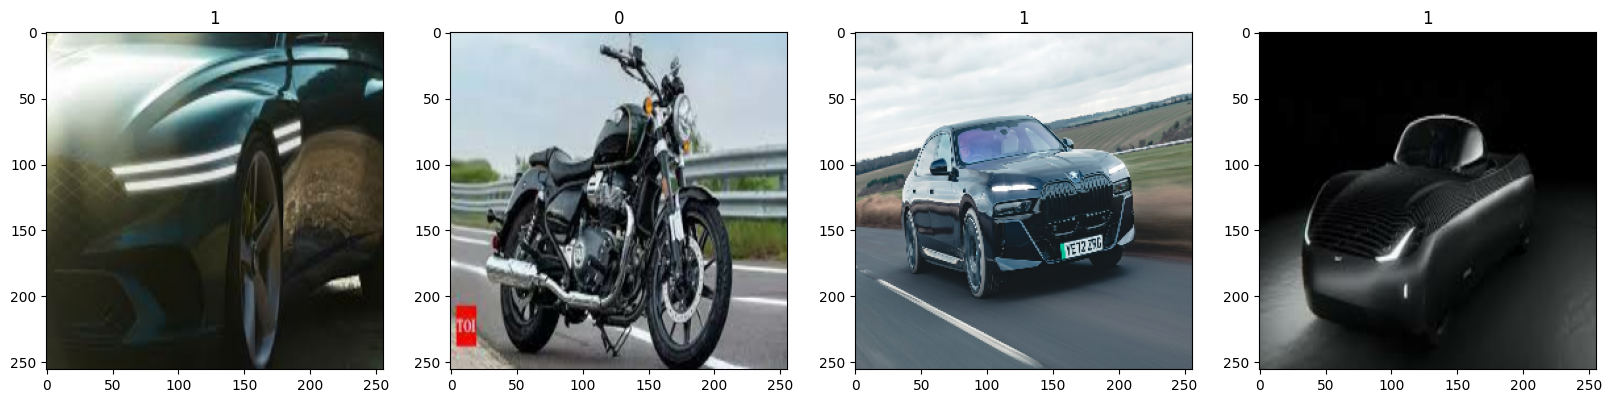

In [278]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

This block of code is using the matplotlib library in Python to create a figure with 4 subplots (or axes), then populate these subplots with the first 4 images from a batch of images.

Let's break it down line-by-line:

fig, ax = plt.subplots(ncols=4, figsize=(20,20)): A call to plt.subplots() here is used to create a new figure and return a tuple containing a figure fig and axes ax. The ncols=4 argument is specifying 4 columns (hence 4 subplots), and figsize=(20,20) is setting the width and height of the full figure to 20 units each.

The ax object is an array containing 4 elements, each being a set of axes that can be individually addressed to create a plot. Think of fig as a piece of graph paper, and ax as an array of 4 plots that will be drawn on that paper.

for idx, img in enumerate(batch[0][:4]):: This line is a basic for-loop with enumeration. enumerate() takes a collection (like a list), and return it as an enumerate object containing index,element pairs. batch[0][:4] is slicing the first 4 elements from the first item (images tensor) in the batch.

So in simple terms, for each index and corresponding image in the first 4 images of our batch:

ax[idx].imshow(img.astype(int)): This line is creating an image plot on the idx subplot of our figure using the corresponding image data. imshow() is a matplotlib function used to display data as an image. Here, the LED intensity values of the image, originally floating point numbers, are being cast to integer values using the astype(int) method before plotting.

ax[idx].title.set_text(batch[1][idx]): This line is setting the title of the idx subplot to be equal to the label of the corresponding image. The titles are useful for providing information about the images being displayed. batch[1][idx] is extracting the label of our corresponding image from our batch data.

To summarise, this code is used to display the first four images in a dataset batch onto 4 different subplots on a single matplotlib figure. Each plot is given a title corresponding to the label of the plotted image.

Note: batch[0] and batch[1] are common naming conventions in Python to refer to the images (input data) and labels (output data) typically stored in a tuple by TensorFlow or PyTorch. This batch data is often used in machine learning when training models with mini-batch gradient descent where data is processed in small batches (rather than all at once) to save memory and potentially provide better model performance.

# Part 2: Pre-Processing our Data and scaling our data .

In [279]:
batch[0].shape

(32, 256, 256, 3)

Phind
In the context of image processing, "scaling to 256" usually refers to the process of resizing or resampling an image so that its height, width, or both are 256 pixels. This is often done to ensure consistency in the size of the images being processed, which is important for many machine learning and computer vision tasks.

n image processing, especially when dealing with neural networks, it's common to normalize the pixel values to a range of 0 to 1. This helps to keep the input values small, making the computations faster and more stable/

Images are usually stored in an 8-bit format, which means that each pixel can take a value from 0 (representing black) to 255 (representing white). When you divide the pixel values by 255, you're scaling these values down to a range between 0 and 1. This process is called normalization and it's a common preprocessing step in machine learning and deep learning.

Normalization makes the training process less sensitive to the scale of features, so we can better solve for the weights. It also helps to avoid "exploding gradients" problem where large error gradients accumulate and result in very large updates to neural network model weights during training .

Here's a simple example of how to normalize image data in Python using OpenCV and Numpy:



```
import cv2
import numpy as np

# Load an image
img = cv2.imread('your-image.jpg', cv2.IMREAD_GRAYSCALE)

# Normalize the image
img_normalized = img / 255.0

# Alternatively, you can use Numpy's built-in function for normalization
img_normalized_np = np.interp(img, (img.min(), img.max()), (0, 1))

```



In this code snippet, we first load an image in grayscale format using cv2.imread(). Then we normalize the image by dividing all pixel values by 255. The result is an image where all pixel values are in the range between 0 and 1. We also show an alternative way of normalizing the image using Numpy's np.interp() function. This function also scales the pixel values to a range between 0 and 1 by interpolating between the minimum and maximum pixel values of the image. The result is the same - a normalized image

RGB images can be normalized in a similar way as grayscale images. In this case, each color channel (Red, Green, and Blue) is treated separately. Each pixel in an RGB image has three values (R, G, B), and each of these values can range from 0 to 255. So, to normalize an RGB image, you divide each of the R, G, and B values for each pixel by 255

In [280]:
scaled = batch[0] / 255

In [281]:
scaled.max()

1.0

In [282]:
scaled.min()

0.0

But as we are using a pipeline, we won't do it for every batch , rather we will use a map function to do automatically for us for every batch

In [283]:
# Scale Data
data = data.map(lambda x,y:(x/255, y)) # Allows(data.map) us to perform transformation in pipeline

data.map will transform the data in the pipeline, we are giving input of features 'x' and labels 'y', and what type of operation we want to perform on each input so basically we only applied the operation on x and left y as it is . both x and y are coming from data iterable.

In [284]:
scaled_iterator = data.as_numpy_iterator()

In [285]:
scaled_iterator

In [286]:
batch = scaled_iterator.next()

In [287]:
batch[0].min(), batch[0].max()

(0.0, 1.0)

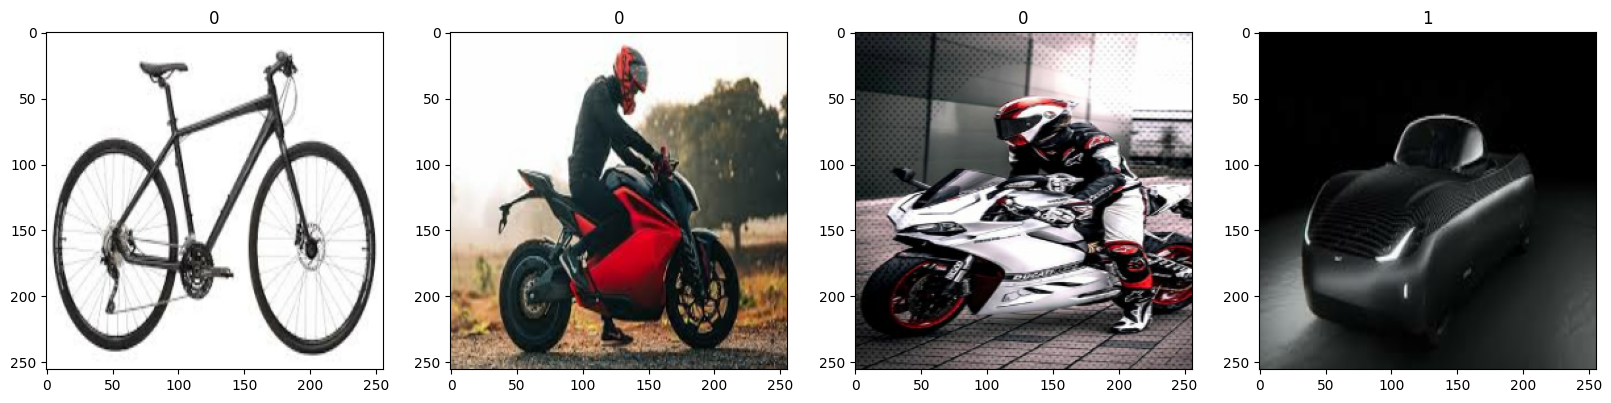

In [288]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # It wont work in int after scaling as we have divided it by 255

    ax[idx].title.set_text(batch[1][idx])

In [289]:
# Split Data

len(data)



16

In [290]:
train_size = int(len(data)*.5)
valida_size = int(len(data)*.3)+1 # finetuning after we have actually training the data
test_size = int(len(data)*.1)+2

In [291]:
train_size

8

In [292]:
valida_size

5

In [293]:
test_size

3

In [294]:
train_size + valida_size + test_size

16

In [295]:
train = data.take(train_size)
val = data.skip(train_size).take(valida_size)
test = data.skip(train_size+valida_size).take(test_size)

take tells how many batches we will get

In [296]:
len(train), len(val), len(test)

(8, 5, 3)

## Building Neural Network
Deep Model Work

In [297]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [298]:
model = Sequential()

In [299]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [300]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [301]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

## Train

In [302]:
logdir='logs'

In [303]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [304]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 9s 667ms/step - loss: 0.6984 - accuracy: 0.5625 - val_loss: 0.6429 - val_accuracy: 0.5063
Epoch 2/20
8/8 [==============================] - 9s 976ms/step - loss: 0.6014 - accuracy: 0.6836 - val_loss: 0.4990 - val_accuracy: 0.8375
Epoch 3/20
8/8 [==============================] - 4s 512ms/step - loss: 0.3423 - accuracy: 0.8906 - val_loss: 0.2515 - val_accuracy: 0.9250
Epoch 4/20
8/8 [==============================] - 3s 351ms/step - loss: 0.3564 - accuracy: 0.8555 - val_loss: 0.2734 - val_accuracy: 0.8687
Epoch 5/20
8/8 [==============================] - 3s 351ms/step - loss: 0.2448 - accuracy: 0.8828 - val_loss: 0.2192 - val_accuracy: 0.9563
Epoch 6/20
8/8 [==============================] - 4s 482ms/step - loss: 0.1853 - accuracy: 0.9727 - val_loss: 0.1332 - val_accuracy: 0.9500
Epoch 7/20
8/8 [==============================] - 3s 346ms/step - loss: 0.0898 - accuracy: 0.9727 - val_loss: 0.1221 - val_accuracy: 0.9563
Epoch 8/20
8/8 [====

## Graph of Performance

In [305]:
hist.history

{'loss': [0.6984401345252991,
  0.6013802886009216,
  0.3423335552215576,
  0.35640010237693787,
  0.2448253482580185,
  0.1852761059999466,
  0.08981188386678696,
  0.05674396827816963,
  0.047437556087970734,
  0.0334465429186821,
  0.056542035192251205,
  0.01767622120678425,
  0.019022390246391296,
  0.020232059061527252,
  0.006169564090669155,
  0.0071960012428462505,
  0.007310674525797367,
  0.002847358351573348,
  0.02217480167746544,
  0.0055926768109202385],
 'accuracy': [0.5625,
  0.68359375,
  0.890625,
  0.85546875,
  0.8828125,
  0.97265625,
  0.97265625,
  0.97265625,
  0.98828125,
  0.9921875,
  0.98828125,
  0.9921875,
  0.99609375,
  0.99609375,
  1.0,
  0.99609375,
  1.0,
  1.0,
  0.99609375,
  0.99609375],
 'val_loss': [0.6428983807563782,
  0.49902501702308655,
  0.2515018880367279,
  0.27341410517692566,
  0.21923121809959412,
  0.13318291306495667,
  0.12212593853473663,
  0.07298444211483002,
  0.07401915639638901,
  0.09500101208686829,
  0.059554923325777054,

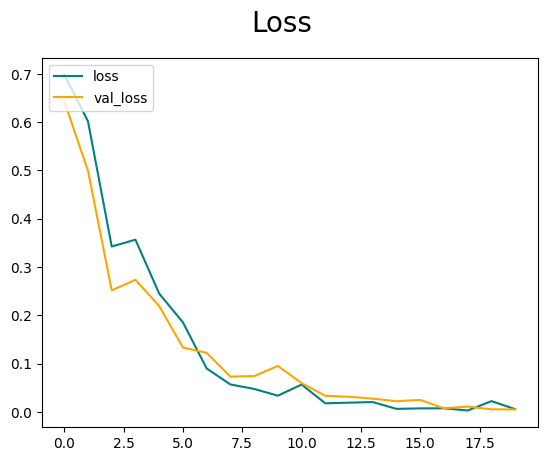

In [306]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

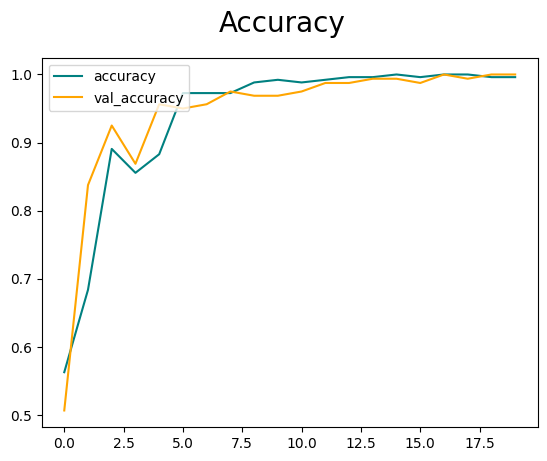

In [307]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evalute the performance on Test Data and New Unseen Data

In [308]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [309]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [310]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 78ms/step


In [311]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


### New data

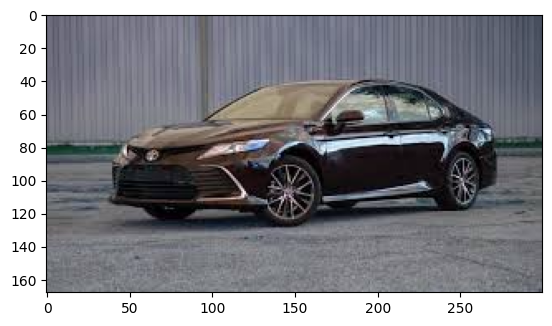

In [312]:
img = cv2.imread('newcar.jpg')
plt.imshow(img)
plt.show()

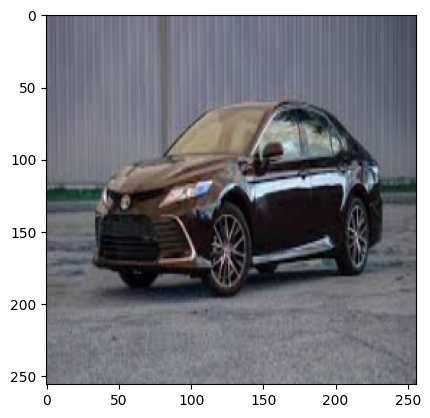

In [313]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [314]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


The code `yhat = model.predict(np.expand_dims(resize/255, 0))` is used to make predictions using a trained model. Here's an explanation of each part:

- `resize`: This is a variable that represents an image or a set of images that you want to make predictions on.

- `/255`: This division by 255 is a common preprocessing step for image data. It scales the pixel values of the image(s) from the original range of 0 to 255 to a new range of 0 to 1. This normalization is often done to ensure that the input data is within a suitable range for the model to process.

- `np.expand_dims(resize/255, 0)`: This code expands the dimensions of the image(s) by adding an extra dimension at the beginning. The `np.expand_dims` function is used to reshape the input data to match the expected input shape of the model. In this case, the extra dimension is added at index 0, which represents the batch size. This is necessary because the `model.predict` method expects a batch of input data, even if it's just a single image.

- `model.predict(...)`: This is a method provided by Keras that is used to make predictions using a trained model. It takes the preprocessed input data as an argument and returns the predicted output. In this case, the input data is the resized and normalized image(s) with the expanded dimensions.

- `yhat`: This is a variable that stores the predicted output(s) generated by the model.

In summary, this code takes an image or a set of images, preprocesses them by resizing and normalizing the pixel values, expands the dimensions to match the expected input shape of the model, and then uses the trained model to make predictions on the preprocessed input data. The predicted output(s) are stored in the `yhat` variable.

In [315]:
yhat

array([[0.9840995]], dtype=float32)

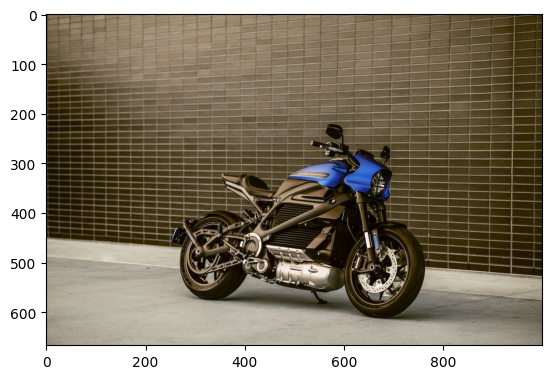

In [316]:
img = cv2.imread('newbike.jpg')
plt.imshow(img)
plt.show()

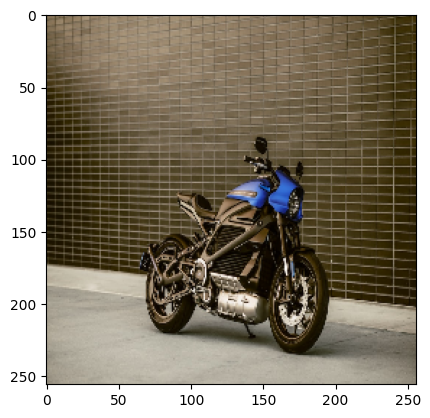

In [317]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [318]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [319]:
yhat

array([[0.19886984]], dtype=float32)

In [321]:
if yhat > 0.5:
    print(f'Predicted class is Car')
else:
    print(f'Predicted class is Bike')

Predicted class is Bike


## Saving the Model

In [322]:
from tensorflow.keras.models import load_model

In [325]:
model.save(os.path.join('models','imageclassifier.h5'))

In [329]:
new_model = load_model('models/imageclassifier.h5')

In [330]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 138ms/step


array([[0.19886984]], dtype=float32)

The `.h5` extension in `model.save(os.path.join('models','imageclassifier.h5'))` refers to the Hierarchical Data Format version 5 (HDF5) file format.

HDF5 is a file format designed to store and organize large amounts of data efficiently. It is commonly used in scientific and numerical computing applications, including machine learning. In the context of machine learning models, the HDF5 format is often used to save and load trained models.

When you save a Keras model using `model.save()`, it serializes the model architecture, model weights, optimizer state, and any additional information required to recreate the model. The resulting file is saved with the `.h5` extension, indicating that it is an HDF5 file.

The HDF5 format provides several advantages for saving and loading models:
- It allows for efficient storage and retrieval of large model parameters.
- It supports compression, which can reduce the file size.
- It preserves the hierarchical structure of the model, making it easy to navigate and access different components of the model.

To load a saved model from an HDF5 file, you can use the `tf.keras.models.load_model()` function, specifying the path to the `.h5` file. This function will recreate the model with the same architecture, weights, and optimizer state as when it was saved.

In summary, the `.h5` extension in `model.save(os.path.join('models','imageclassifier.h5'))` indicates that the model is being saved in the HDF5 file format, which is a common format for storing trained machine learning models.

# Finish